# Association Analysis
## Frequent Itemset Mining using Apriori Algorithm

### Importing Libaries

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data

The Data set we've selected is Online retail.xlsx file

In [5]:
df = pd.read_csv('./data/csvfile.csv', sep=',')

In the above statement we are converting .xlsx file to .csv file.

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In the above statement we are printing first 10 tuples of the dataset.

In [7]:
a = df.filter(like='StockCode').values.T.ravel()
b = df.filter(like='Country').values.T.ravel()
c = df.filter(like='Quantity').values.T.ravel()
df1 = pd.DataFrame({'StockCode':a, 'Country':b , 'Quantity':c}, columns=['StockCode','Country','Quantity'])
df2=df1.drop_duplicates()
print (df2)

       StockCode         Country  Quantity
0         85123A  United Kingdom         6
1          71053  United Kingdom         6
2         84406B  United Kingdom         8
3         84029G  United Kingdom         6
4         84029E  United Kingdom         6
...          ...             ...       ...
541781     22549         Germany        24
541786     22622         Germany         6
541798     22081         Germany        10
541814     23350  United Kingdom        25
541868     85038  United Kingdom        48

[67427 rows x 3 columns]


The dataset we considered is having in detail description of each Stockcode but we just need Stockcode, Country and Quantity to apply apriori algoritham. 
So, here we are Filtering the whole table by considering only the required columns.

In [8]:
df3=df2.head(20000)
print (df3)

      StockCode         Country  Quantity
0        85123A  United Kingdom         6
1         71053  United Kingdom         6
2        84406B  United Kingdom         8
3        84029G  United Kingdom         6
4        84029E  United Kingdom         6
...         ...             ...       ...
70593     22967  United Kingdom         3
70594     22021  United Kingdom         4
70595    85206A  United Kingdom         4
70601     21626  United Kingdom        10
70607     21472  United Kingdom        12

[20000 rows x 3 columns]


Playing with dataset.

In [9]:
df4=df2.sort_values(by=['Country'])

df9=df4.Country.value_counts()
print (df9)

United Kingdom          42929
EIRE                     3697
Germany                  3339
France                   2959
Spain                    1655
Switzerland              1444
Netherlands              1396
Australia                1049
Portugal                 1040
Belgium                  1011
Norway                    764
Italy                     602
Cyprus                    566
Finland                   548
Channel Islands           537
Unspecified               409
Sweden                    359
Austria                   334
Denmark                   324
Japan                     311
Israel                    286
USA                       283
Poland                    256
Hong Kong                 253
Singapore                 199
Canada                    148
Greece                    140
Iceland                   126
Malta                     113
United Arab Emirates       68
RSA                        58
European Community         56
Lebanon                    45
Lithuania 

In [10]:
df4

,StockCode,Country,Quantity
90167,23230,Australia,200
270071,23236,Australia,-1
270072,23235,Australia,-1
270073,23232,Australia,-1
270074,23229,Australia,-1
...,...,...,...
498779,23570,Unspecified,12
498780,23571,Unspecified,12
498782,23309,Unspecified,24
263005,21628,Unspecified,2


Counting the occurences of each country. We've considered United Kingdom as it's having highest number of stocks.

In [8]:
df5=df4.sort_values(by=['Quantity'], ascending=False)
print (df5)

       StockCode         Country  Quantity
540421     23843  United Kingdom     80995
61619      23166  United Kingdom     74215
502122     84826  United Kingdom     12540
74614      37413  United Kingdom      5568
421632     84077  United Kingdom      4800
...          ...             ...       ...
225528     23003  United Kingdom     -9058
4287       84347  United Kingdom     -9360
225529     23005  United Kingdom     -9600
61624      23166  United Kingdom    -74215
540422     23843  United Kingdom    -80995

[67427 rows x 3 columns]


We are sorting the quantity values.

In [9]:
df6=df5.loc[df['Country'] == 'United Kingdom']
print (df6)

       StockCode         Country  Quantity
540421     23843  United Kingdom     80995
61619      23166  United Kingdom     74215
502122     84826  United Kingdom     12540
74614      37413  United Kingdom      5568
421632     84077  United Kingdom      4800
...          ...             ...       ...
225528     23003  United Kingdom     -9058
4287       84347  United Kingdom     -9360
225529     23005  United Kingdom     -9600
61624      23166  United Kingdom    -74215
540422     23843  United Kingdom    -80995

[42929 rows x 3 columns]


Printing the stocks of only United Kingdom.

In [17]:
basket = (df[df['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket.head(10)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In the country United Kingdom we are filtering the occurance of stocks with invoice number and we are filling all null values with zero

In [20]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

 cleaning the data by removing negative and Zero values.

In [19]:
print(basket_sets)

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   
...                                     ...                             ...   
C581484                                   0                               0   
C581490                                   0                               0   
C581499                                   0                               0   
C581568                                   0                               0   
C581569                                   0         

### Applying Apriori


apriori module from mlxtend library provides fast and efficient apriori implementation.

In [13]:
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)
print (frequent_itemsets)

     support                                           itemsets
0   0.038793                           (6 RIBBONS RUSTIC CHARM)
1   0.034165                      (60 TEATIME FAIRY CAKE CASES)
2   0.039746                       (ALARM CLOCK BAKELIKE GREEN)
3   0.042196                        (ALARM CLOCK BAKELIKE RED )
4   0.030672                     (ANTIQUE SILVER T-LIGHT GLASS)
..       ...                                                ...
82  0.048820                (WOODEN PICTURE FRAME WHITE FINISH)
83  0.030989                           (WOODLAND CHARLOTTE BAG)
84  0.031806  (ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...
85  0.035617  (JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA...
86  0.031670  (JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)

[87 rows x 2 columns]


using apriori function from mlextend package we are genrating frequent items using minimum support

In [14]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043421,0.042377,0.031806,0.732497,17.285056,0.029966,3.579862
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.042377,0.043421,0.031806,0.750535,17.285056,0.029966,3.834527
2,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.087931,0.052586,0.035617,0.405057,7.702719,0.030993,1.592444
3,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052586,0.087931,0.035617,0.677308,7.702719,0.030993,2.826438
4,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.087931,0.051270,0.031670,0.360165,7.024813,0.027161,1.482773
5,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.051270,0.087931,0.031670,0.617699,7.024813,0.027161,2.385736


In [15]:
rules = rules[ (rules['lift'] >= 0.6) &
       (rules['confidence'] >= 0.5) ]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043421,0.042377,0.031806,0.732497,17.285056,0.029966,3.579862
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.042377,0.043421,0.031806,0.750535,17.285056,0.029966,3.834527
3,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052586,0.087931,0.035617,0.677308,7.702719,0.030993,2.826438
5,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.051270,0.087931,0.031670,0.617699,7.024813,0.027161,2.385736


### Visualizing results

1. **Support vs Confidence**

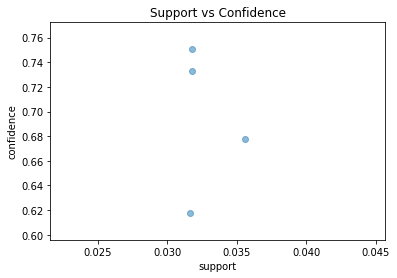

In [16]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

The above graph is the Visualizing result of Support vs Confidence of Online Retail dataset.